In [56]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns

In [57]:
#importent library's 
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [63]:
df.shape

(4340, 8)

In [84]:
# Split the column name to get the model of the car
df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

In [64]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [83]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [85]:
# Drop all duplicated row
df = df.drop_duplicates()

df.shape

(3577, 9)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [87]:
# View unique values from categorical features
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for col in categorical:
  print(df[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [89]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [91]:
car = df.copy()

In [92]:
car["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object')

In [96]:
def percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.2
        height = i.get_height()+4.3 
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=14,color='black')

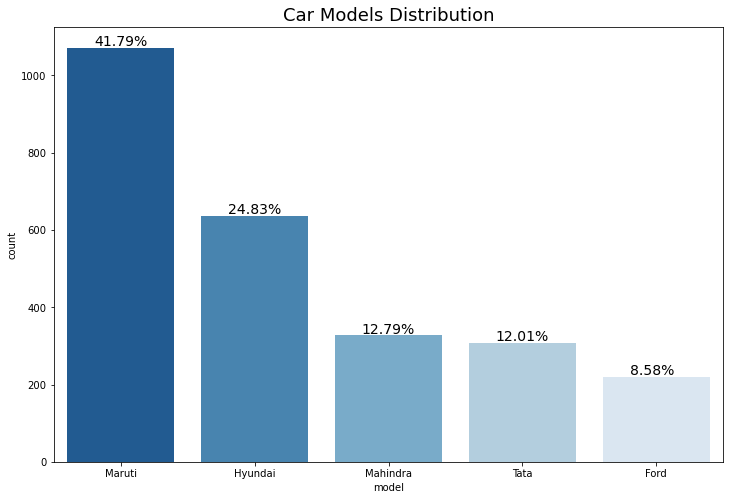

In [97]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="model", data=car, order = car['model'].value_counts().index[:5], palette='Blues_r')
percent(plot)

plt.show()

In [105]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Blues_r', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count       3577
unique         5
top       Diesel
freq        1800
Name: fuel, dtype: object
mode:  0    Diesel
Name: fuel, dtype: object
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64


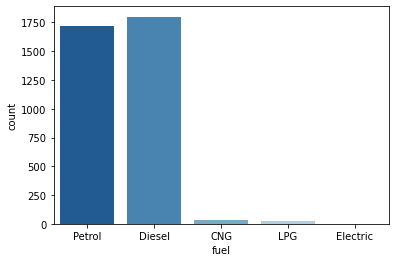

In [106]:
categorical_summarized(car, x='fuel')

count           3577
unique             3
top       Individual
freq            2832
Name: seller_type, dtype: object
mode:  0    Individual
Name: seller_type, dtype: object
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64


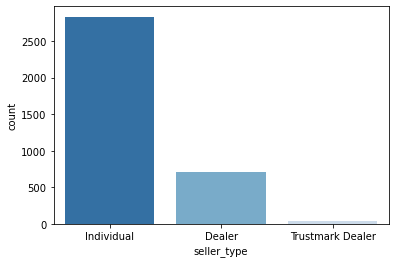

In [108]:
  categorical_summarized(car, x='seller_type')

count       3577
unique         2
top       Manual
freq        3265
Name: transmission, dtype: object
mode:  0    Manual
Name: transmission, dtype: object
Manual       3265
Automatic     312
Name: transmission, dtype: int64


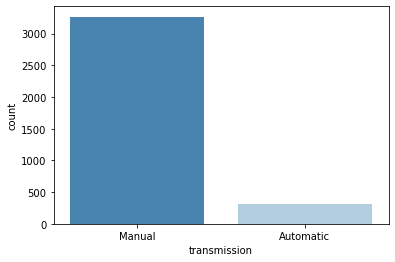

In [109]:
categorical_summarized(car, x='transmission')

count            3577
unique              5
top       First Owner
freq             2218
Name: owner, dtype: object
mode:  0    First Owner
Name: owner, dtype: object
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64


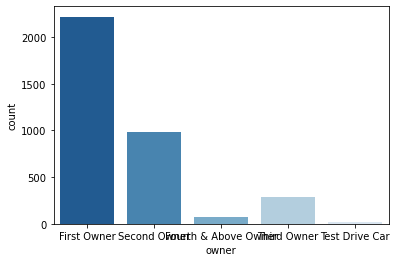

In [110]:
categorical_summarized(car, x='owner')

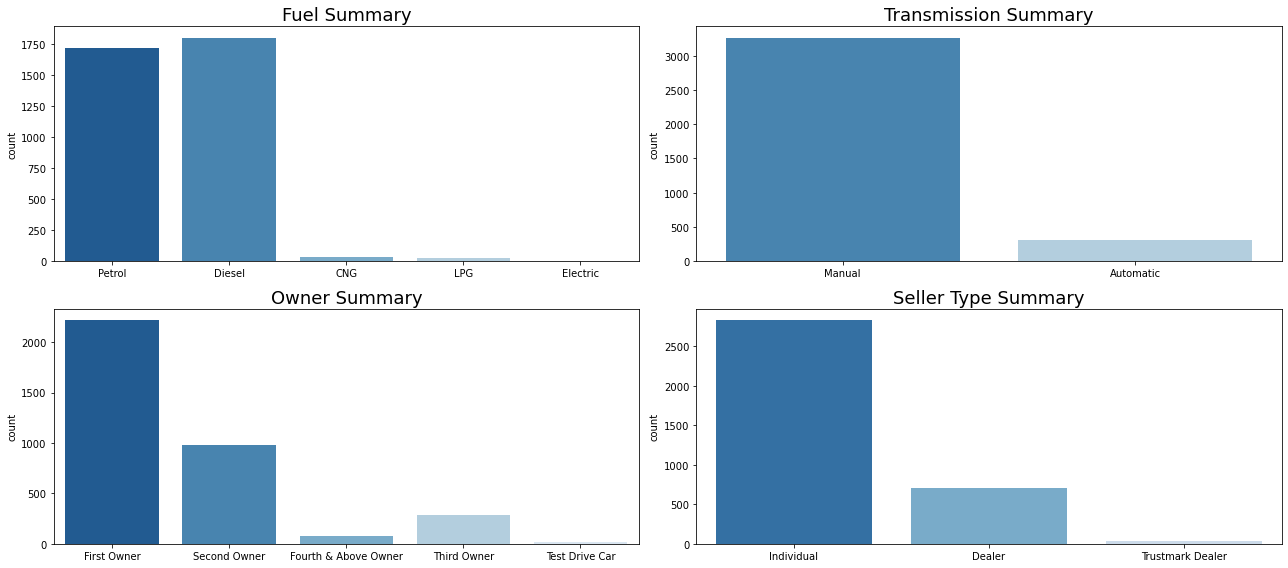

In [111]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
#### correlation metrix

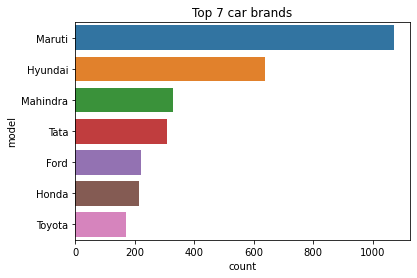

In [107]:
sns.countplot(y=df["model"],
              order=df['model'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 car brands')
plt.show()

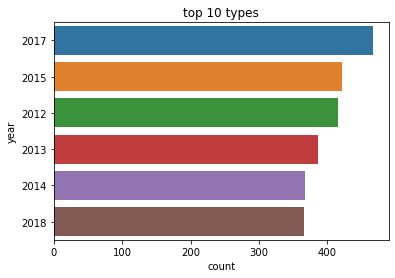

In [15]:
sns.countplot(y=df['year'],
             order=df['year'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('top 10 types')
plt.show()

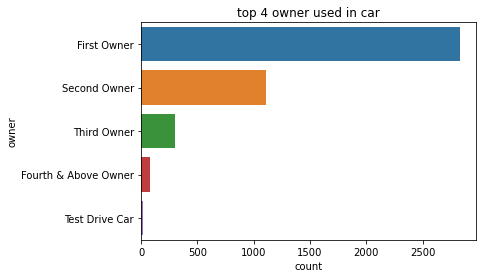

In [16]:
sns.countplot(y=df['owner'],
              order=df['owner'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 owner used in car')
plt.show()

In [17]:
 df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

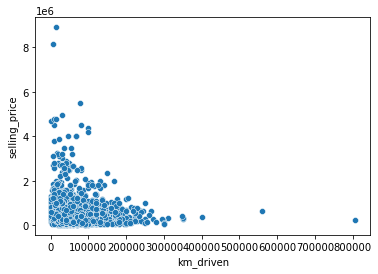

In [115]:
sns.scatterplot(y=df['selling_price'],x=df['km_driven'])
plt.show()

# Box for different fuels 

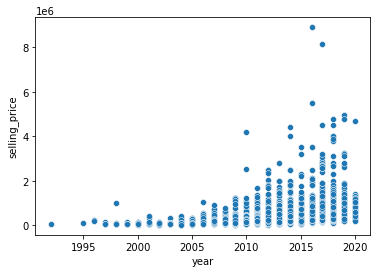

In [119]:
sns.scatterplot(x=df['year'],y=df['selling_price'])
plt.show()

#### Boxplot for Company based on Price

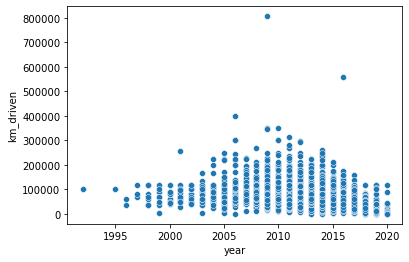

In [120]:
sns.scatterplot(x=df['year'],y=df['km_driven'])
plt.show()

In [ ]:
### Detailed Analysis in selling_price, km_driven, year

In [129]:
pd.pivot_table(data=car, index=['name'],
               values=['selling_price','km_driven','year']).sort_values(by='selling_price', ascending=False)

,km_driven,selling_price,year
name,,,
Audi RS7 2015-2019 Sportback Performance,13000.0,8900000.0,2016.0
Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500.0,8150000.0,2017.0
Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350.0,5500000.0,2016.0
BMW X5 xDrive 30d xLine,30000.0,4950000.0,2019.0
Audi A5 Sportback,1500.0,4700000.0,2020.0
...,...,...,...
Tata Nano Std BSII,50000.0,35000.0,2009.0
OpelCorsa 1.4 GL,100000.0,35000.0,2002.0
Maruti 800 EX,45000.0,35000.0,2002.5


In [131]:
pd.pivot_table(data=car, index=['name'],
               
               values=['selling_price','km_driven','year']).sort_values(by='km_driven', ascending=False)

,km_driven,selling_price,year
name,,,
Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,350000.0,280000.0,2010.0
Maruti SX4 S Cross DDiS 320 Delta,320000.0,495000.0,2015.5
Volkswagen Jetta 2.0 TDI Comfortline,312000.0,350000.0,2011.0
Mahindra Xylo E9,295000.0,300000.0,2012.0
Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,281500.0,550000.0,2008.0
...,...,...,...
Renault KWID Climber 1.0 MT Opt BSIV,1000.0,541000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Ford Ecosport Sports Petrol,1000.0,1100000.0,2020.0


In [134]:
pd.pivot_table(data=car, index=['name'], 
               values=['selling_price','km_driven','year']).sort_values(by='year', ascending=False)

,km_driven,selling_price,year
name,,,
Ford Freestyle Titanium Plus,1010.0,852000.0,2020.0
Mahindra Scorpio S5 BSIV,11000.0,1200000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Hyundai Grand i10 Nios Sportz,5000.0,600000.0,2020.0
Hyundai Elite i20 Magna Plus BSIV,7300.0,545000.0,2020.0
...,...,...,...
Maruti Omni 5 Str STD,60000.0,65000.0,1998.0
Mercedes-Benz E-Class 230,35000.0,1000000.0,1998.0
Maruti Esteem AX,70000.0,79000.0,1997.0


In [ ]:
###How does Categorical Feature affects selling_price

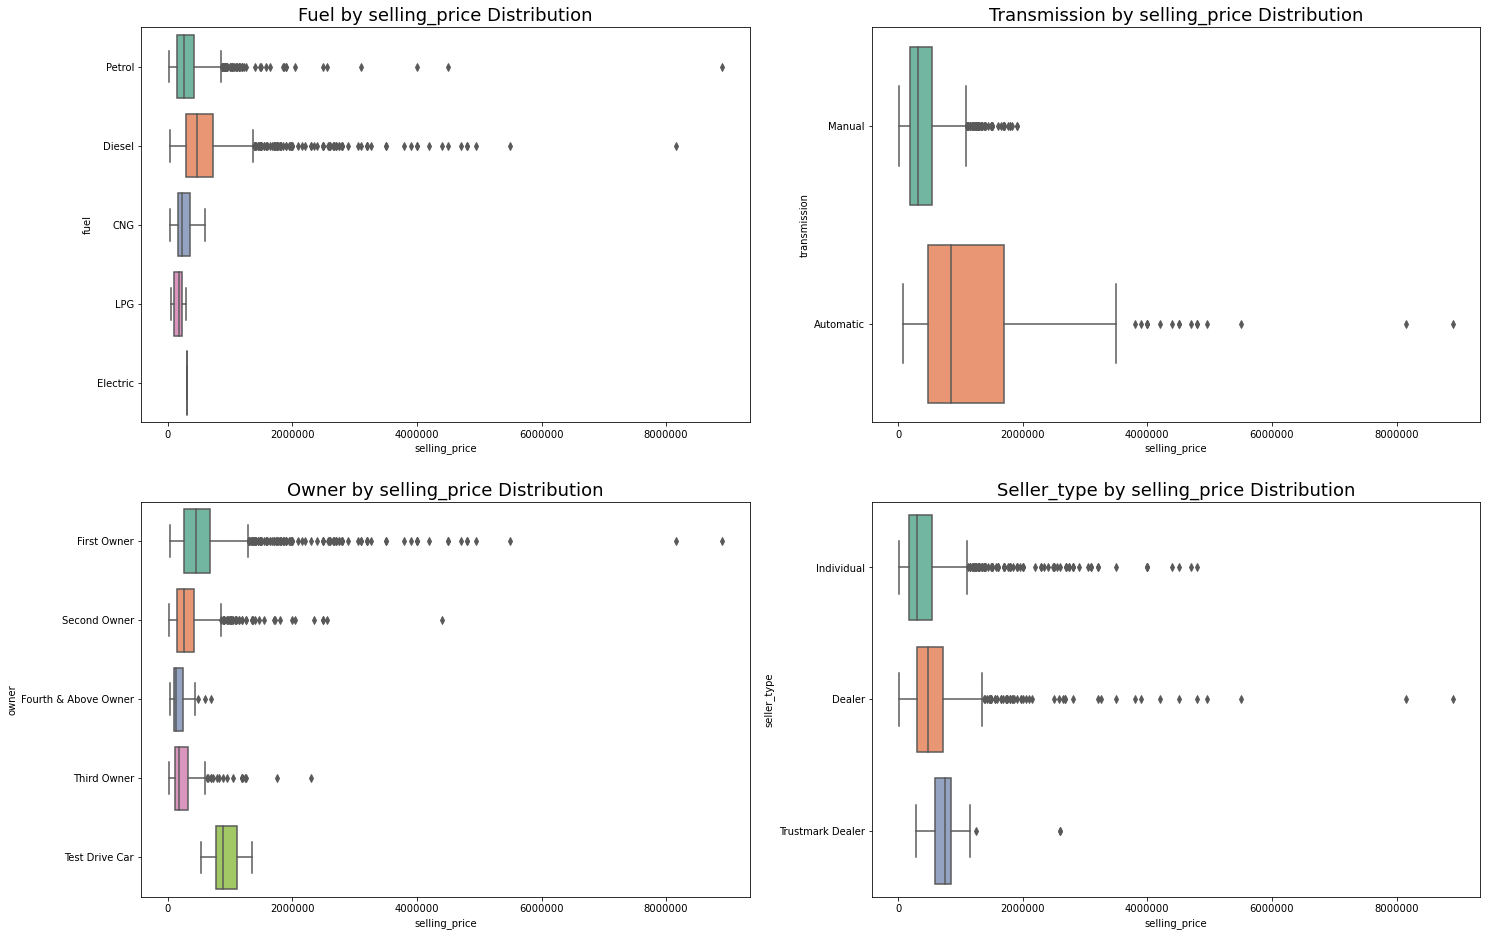

In [130]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

In [21]:
###Distribution Plot for Price

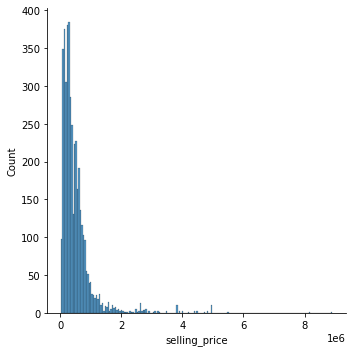

In [22]:
sns.displot(df['selling_price'])
plt.show()

In [23]:
###correlation

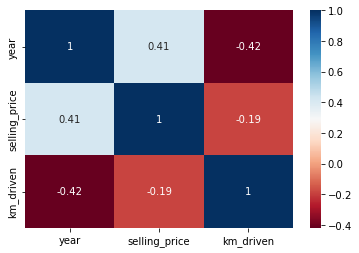

In [73]:
corr =  df.corr()


sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [75]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2001.00,2003.0,2004.0,2005.0,2014.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,55000.00,65000.0,70000.0,80000.0,350000.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,1444.68,5000.0,6483.4,10000.0,60000.0,163830.0,186000.0,220000.0,806599.0


In [136]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

In [ ]:
#### Outlier handling

In [ ]:
#### We will handle Encoding catgeorical columns using ColumnTransformer
#### Select x(independent features) and y(dependent feature)

In [179]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3577, 8)
(3577,)


In [151]:
print(3577*0.25)

4471.25


In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 8)
(895, 8)
(2682,)
(895,)


In [153]:
#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [173]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [156]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [157]:
x_train.dtypes

name            object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
model           object
dtype: object

In [ ]:
####Import ML model buliding libraries

In [174]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [175]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [177]:
#Columns index that needs to undergo OnehOtEncoding - [0,1,6,9,10]

In [ ]:
#### 1) LinearRegression

In [ ]:
#### 2) Ridge Regression 

In [ ]:
#### 4) RandomForest Model

In [ ]:
#### 5) Decision Tree Regressor

In [ ]:
#### DT is the best performing model based on RMSE

In [ ]:
#### Model saving

In [181]:
import pickle

In [182]:
pickle.dump(pipe_dt,open('dt_modelcar.pkl','wb'))
pickle.dump(df,open('datacar.pkl','wb'))